<a href="https://colab.research.google.com/github/VaibhavGIT5048/DTI/blob/main/Anomalyzer_Interactive_Anomaly_Detection_with_Streamlit_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🧪 Step 1: Import Libraries

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the path to your file
df = pd.read_csv('/content/unlabeled_time_loc_dataset.csv')

# Display the first few rows of the dataframe
df.head()



,time,loc
0,2.198686,4.944694
1,2.259075,5.609212
2,1.906339,4.906345
3,2.631685,5.306974
4,1.812210,5.217024


#📊 Step 2: Understand the outliners and the dataset

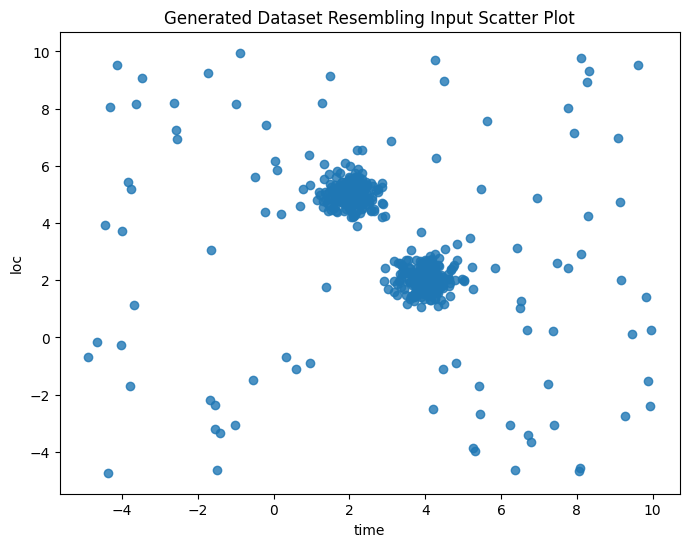

,time,loc
0,2.198686,4.944694
1,2.259075,5.609212
2,1.906339,4.906345
3,2.631685,5.306974
4,1.812210,5.217024


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate two clusters
cluster1 = np.random.normal(loc=[2, 5], scale=0.4, size=(200, 2))
cluster2 = np.random.normal(loc=[4, 2], scale=0.4, size=(200, 2))

# Generate scattered outliers
outliers = np.random.uniform(low=[-5, -5], high=[10, 10], size=(100, 2))

# Combine into one dataset
data = np.vstack((cluster1, cluster2, outliers))

# Create DataFrame with column names 'time' and 'loc'
df = pd.DataFrame(data, columns=['time', 'loc'])

# Plot to confirm it resembles the original image
plt.figure(figsize=(8, 6))
plt.scatter(df['time'], df['loc'], alpha=0.8)
plt.title("Generated Dataset Resembling Input Scatter Plot")
plt.xlabel("time")
plt.ylabel("loc")
plt.grid(False)
plt.show()

# Show first few rows of the dataset
df.head()

#Step 3: Import Libraries

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

#step 4 : Load DataSet

In [ ]:
# Load or create your dataset
df = pd.read_csv('unlabeled_time_loc_dataset.csv')  # or use your own DataFrame

# Step 5: Initialize Isolation Forest

In [ ]:
iso_forest = IsolationForest(contamination=0.2, random_state=42)  # 20% of data as anomalies

#⚙️ Step 6: Fit the Model

In [ ]:
iso_forest.fit(df[['time', 'loc']])

IsolationForest(contamination=0.2, random_state=42)

#🧩 Step 7: Predict Anomalies

In [ ]:
# -1 means anomaly, 1 means normal
Prediction = df['anomaly_label'] = iso_forest.predict(df[['time', 'loc']])
print(Prediction )


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

# 🔍 Step 8: Find Anomaly Indices

In [ ]:
anomaly_indices = df[df['anomaly_label'] == -1].index.tolist()
#print("Anomaly indices:", anomaly_indices[:10])  # Print first 10
print(anomaly_indices)

[89, 104, 131, 239, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 499]


#🟥 Step 9: Mark Anomalies (Boolean Column)
#True ---> Anomaly
#False ---> Normal Data

In [ ]:
AC= df['is_anomaly'] = df['anomaly_label'] == -1
print(AC)

0      False
1      False
2      False
3      False
4      False
       ...  
495     True
496     True
497     True
498    False
499     True
Name: anomaly_label, Length: 500, dtype: bool


#📈 Step 10: Visualize Results

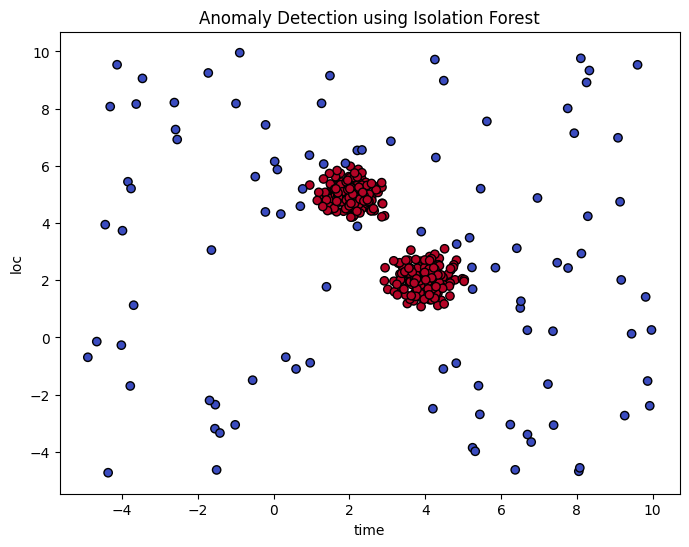

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['time'], df['loc'], c=df['anomaly_label'], cmap='coolwarm', edgecolors='k')
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("time")
plt.ylabel("loc")
plt.grid(False)
plt.show()

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv("labeled_anomaly_dataset.csv", index=False)

# Download it using Colab's file module
from google.colab import files
files.download("labeled_anomaly_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#🖥️ FRONTEND

In [3]:
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [4]:
!pip install --upgrade streamlit


In [5]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


st.title("Anomaly Detection using Isolation Forest")

uploaded_file = st.file_uploader("Upload CSV with 'time' and 'loc' columns", type="csv")

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write("Uploaded Data:", df.head())

    # Apply Isolation Forest
    model = IsolationForest(contamination=0.2, random_state=42)
    model.fit(df[['time', 'loc']])
    df['anomaly_label'] = model.predict(df[['time', 'loc']])
    df['is_anomaly'] = df['anomaly_label'] == -1

    st.subheader("Labeled Dataset with Anomalies")
    st.dataframe(df)

    # Download button
    csv = df.to_csv(index=False).encode('utf-8')
    st.download_button("Download Labeled CSV", csv, "labeled_anomaly_dataset.csv", "text/csv")

    # Show scatter plot for clustering
    st.subheader("Cluster Visualization with Anomalies Marked")
    fig, ax = plt.subplots()
    normal_data = df[df['is_anomaly'] == False]
    anomaly_data = df[df['is_anomaly'] == True]

    ax.scatter(normal_data['time'], normal_data['loc'], c='blue', label='Normal')
    ax.scatter(anomaly_data['time'], anomaly_data['loc'], c='red', label='Anomaly')
    ax.set_xlabel('Time')
    ax.set_ylabel('Location')
    ax.legend()
    ax.set_title('Anomaly Detection Result')
    st.pyplot(fig)

    # Optional Grok parsing
    st.subheader("Optional: Grok Pattern Matching (for logs)")
    log_input = st.text_input("Enter a log line to parse:")
    pattern = st.text_input("Enter Grok pattern (e.g. %{NUMBER:time} %{NUMBER:loc})")



Writing app.py


In [6]:
from pyngrok import ngrok

# Only needed once
ngrok.set_auth_token("2wrM3pp1qy0BdF2qSg6TIoe7PLh_2g86dN9JyCC3D5MhuHpwk")


In [ ]:
!pip install --upgrade streamlit


In [7]:
import subprocess

# Start the Streamlit app
process = subprocess.Popen(["streamlit", "run", "app.py"])


#RUN THESE STEP TO ACTIVATE THE WEB_APP

#STEP-1

In [8]:
# Connect to port 8501
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://2111-35-231-98-52.ngrok-free.app" -> "http://localhost:8501"


#STEP-2

In [ ]:
# Kill the streamlit process
process.terminate()

# Kill the ngrok tunnel
from pyngrok import ngrok
ngrok.kill()
